#  WALLET TRUST SCORE (DATA) ANALYSIS

In [1]:
import pandas as pd
import glob
import os


folder_path = "/content/drive/MyDrive/blockchain/"

# folder existsance
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The folder {folder_path} does not exist")

# CSV files in the blockchain folder
all_files = glob.glob(os.path.join(folder_path, "*.xls*")) + \
            glob.glob(os.path.join(folder_path, "*.csv"))

if not all_files:
    available_files = os.listdir(folder_path)
    raise FileNotFoundError(
        f"No Excel or CSV files found in {folder_path}\n"
        f"Available files: {available_files}"
    )

print(f"Found {len(all_files)} files to merge:")
for f in all_files:
    print(f" - {os.path.basename(f)}")

#  file BASED on extensions
dfs = []
for f in all_files:
    try:
        if f.endswith('.csv'):
            dfs.append(pd.read_csv(f))
        else:  # .xls, .xlsx
            dfs.append(pd.read_excel(f))
    except Exception as e:
        print(f"Error reading {f}: {str(e)}")
        continue

if not dfs:
    raise ValueError("No files were successfully read")


df = pd.concat(dfs, ignore_index=True)

# merged data
output_path = os.path.join(folder_path, "merged_wallet_data.csv")
df.to_csv(output_path, index=False)
print(f"\nSuccessfully merged {len(dfs)} files into {output_path}")
print(f"Final DataFrame shape: {df.shape}")

Found 24 files to merge:
 - export-transaction-list-1744110485753.csv
 - export-transaction-list-1744110499789.csv
 - export-transaction-list-1744110506833.csv
 - export-transaction-list-1744110516373.csv
 - export-transaction-list-1744110559075.csv
 - export-transaction-list-1744110565390.csv
 - export-transaction-list-1744110618418.csv
 - export-transaction-list-1744110623329.csv
 - export-transaction-list-1744110630161.csv
 - export-transaction-list-1744110636267.csv
 - export-transaction-list-1744110641210.csv
 - export-transaction-list-1744110647377.csv
 - export-transaction-list-1744110736862.csv
 - export-transaction-list-1744110740778.csv
 - export-transaction-list-1744110743543.csv
 - export-transaction-list-1744110746341.csv
 - export-transaction-list-1744110750625.csv
 - export-transaction-list-1744110753840.csv
 - export-transaction-list-1744110759307.csv
 - export-transaction-list-1744110809883.csv
 - wallet_risk_score_20250623_112430.csv
 - wallet_risk_scores.csv
 - clean

/tmp/ipython-input-4277565812.py:32: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(f))



Successfully merged 24 files into /content/drive/MyDrive/blockchain/merged_wallet_data.csv
Final DataFrame shape: (6141915, 22)


# **Feature Engineering (Key Risk Signals)**

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/blockchain/merged_wallet_data.csv")

def clean_currency(column):
    return (
        column.astype(str)
        .str.extract(r'([\d,.]+)')[0]
        .str.replace(',', '', regex=False)
        .replace('', np.nan)
        .astype(float)
    )



# cleaning
df['Value (USD)'] = clean_currency(df['Value (USD)'])
df['Txn Fee'] = clean_currency(df['Txn Fee'])

# cleaned data
df.to_csv("/content/drive/MyDrive/blockchain/cleaned_wallet_data.csv", index=False)
print("Successfully cleaned and saved!")

/tmp/ipython-input-4054240411.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/blockchain/merged_wallet_data.csv")


Successfully cleaned and saved!


# **EDA**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/blockchain/cleaned_wallet_data.csv")

# Info & schema
print("=== Data Overview ===")
print(df.info())
print("\n=== Summary Statistics ===")
print(df.describe(include='all').T)

# Missing values
print("\n=== Missing Values ===")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)



# "Wallet Address" and "Txn Type"
if 'Wallet Address' in df.columns:
    top_wallets = df.groupby('Wallet Address')['Value (USD)'].sum().nlargest(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_wallets.values, y=top_wallets.index)
    plt.title("Top 10 Wallets by Total Transaction Value")
    plt.xlabel("Total Value (USD)")
    plt.ylabel("Wallet Address")
    plt.show()


=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141915 entries, 0 to 6141914
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Transaction Hash      object 
 1   Status                object 
 2   Method                object 
 3   Blockno               float64
 4   DateTime (UTC)        object 
 5   From                  object 
 6   From_Nametag          object 
 7   To                    object 
 8   To_Nametag            object 
 9   Amount                object 
 10  Value (USD)           float64
 11  Txn Fee               float64
 12  total_tx              float64
 13  avg_value_usd         float64
 14  total_volume_usd      float64
 15  avg_gas               float64
 16  unique_to             float64
 17  interacted_with_scam  float64
 18  recency_days          float64
 19  gas_ratio             float64
 20  risk_score            float64
 21  high_gas_user         float64
dtypes: float64(13), obje

# VISUALISATION

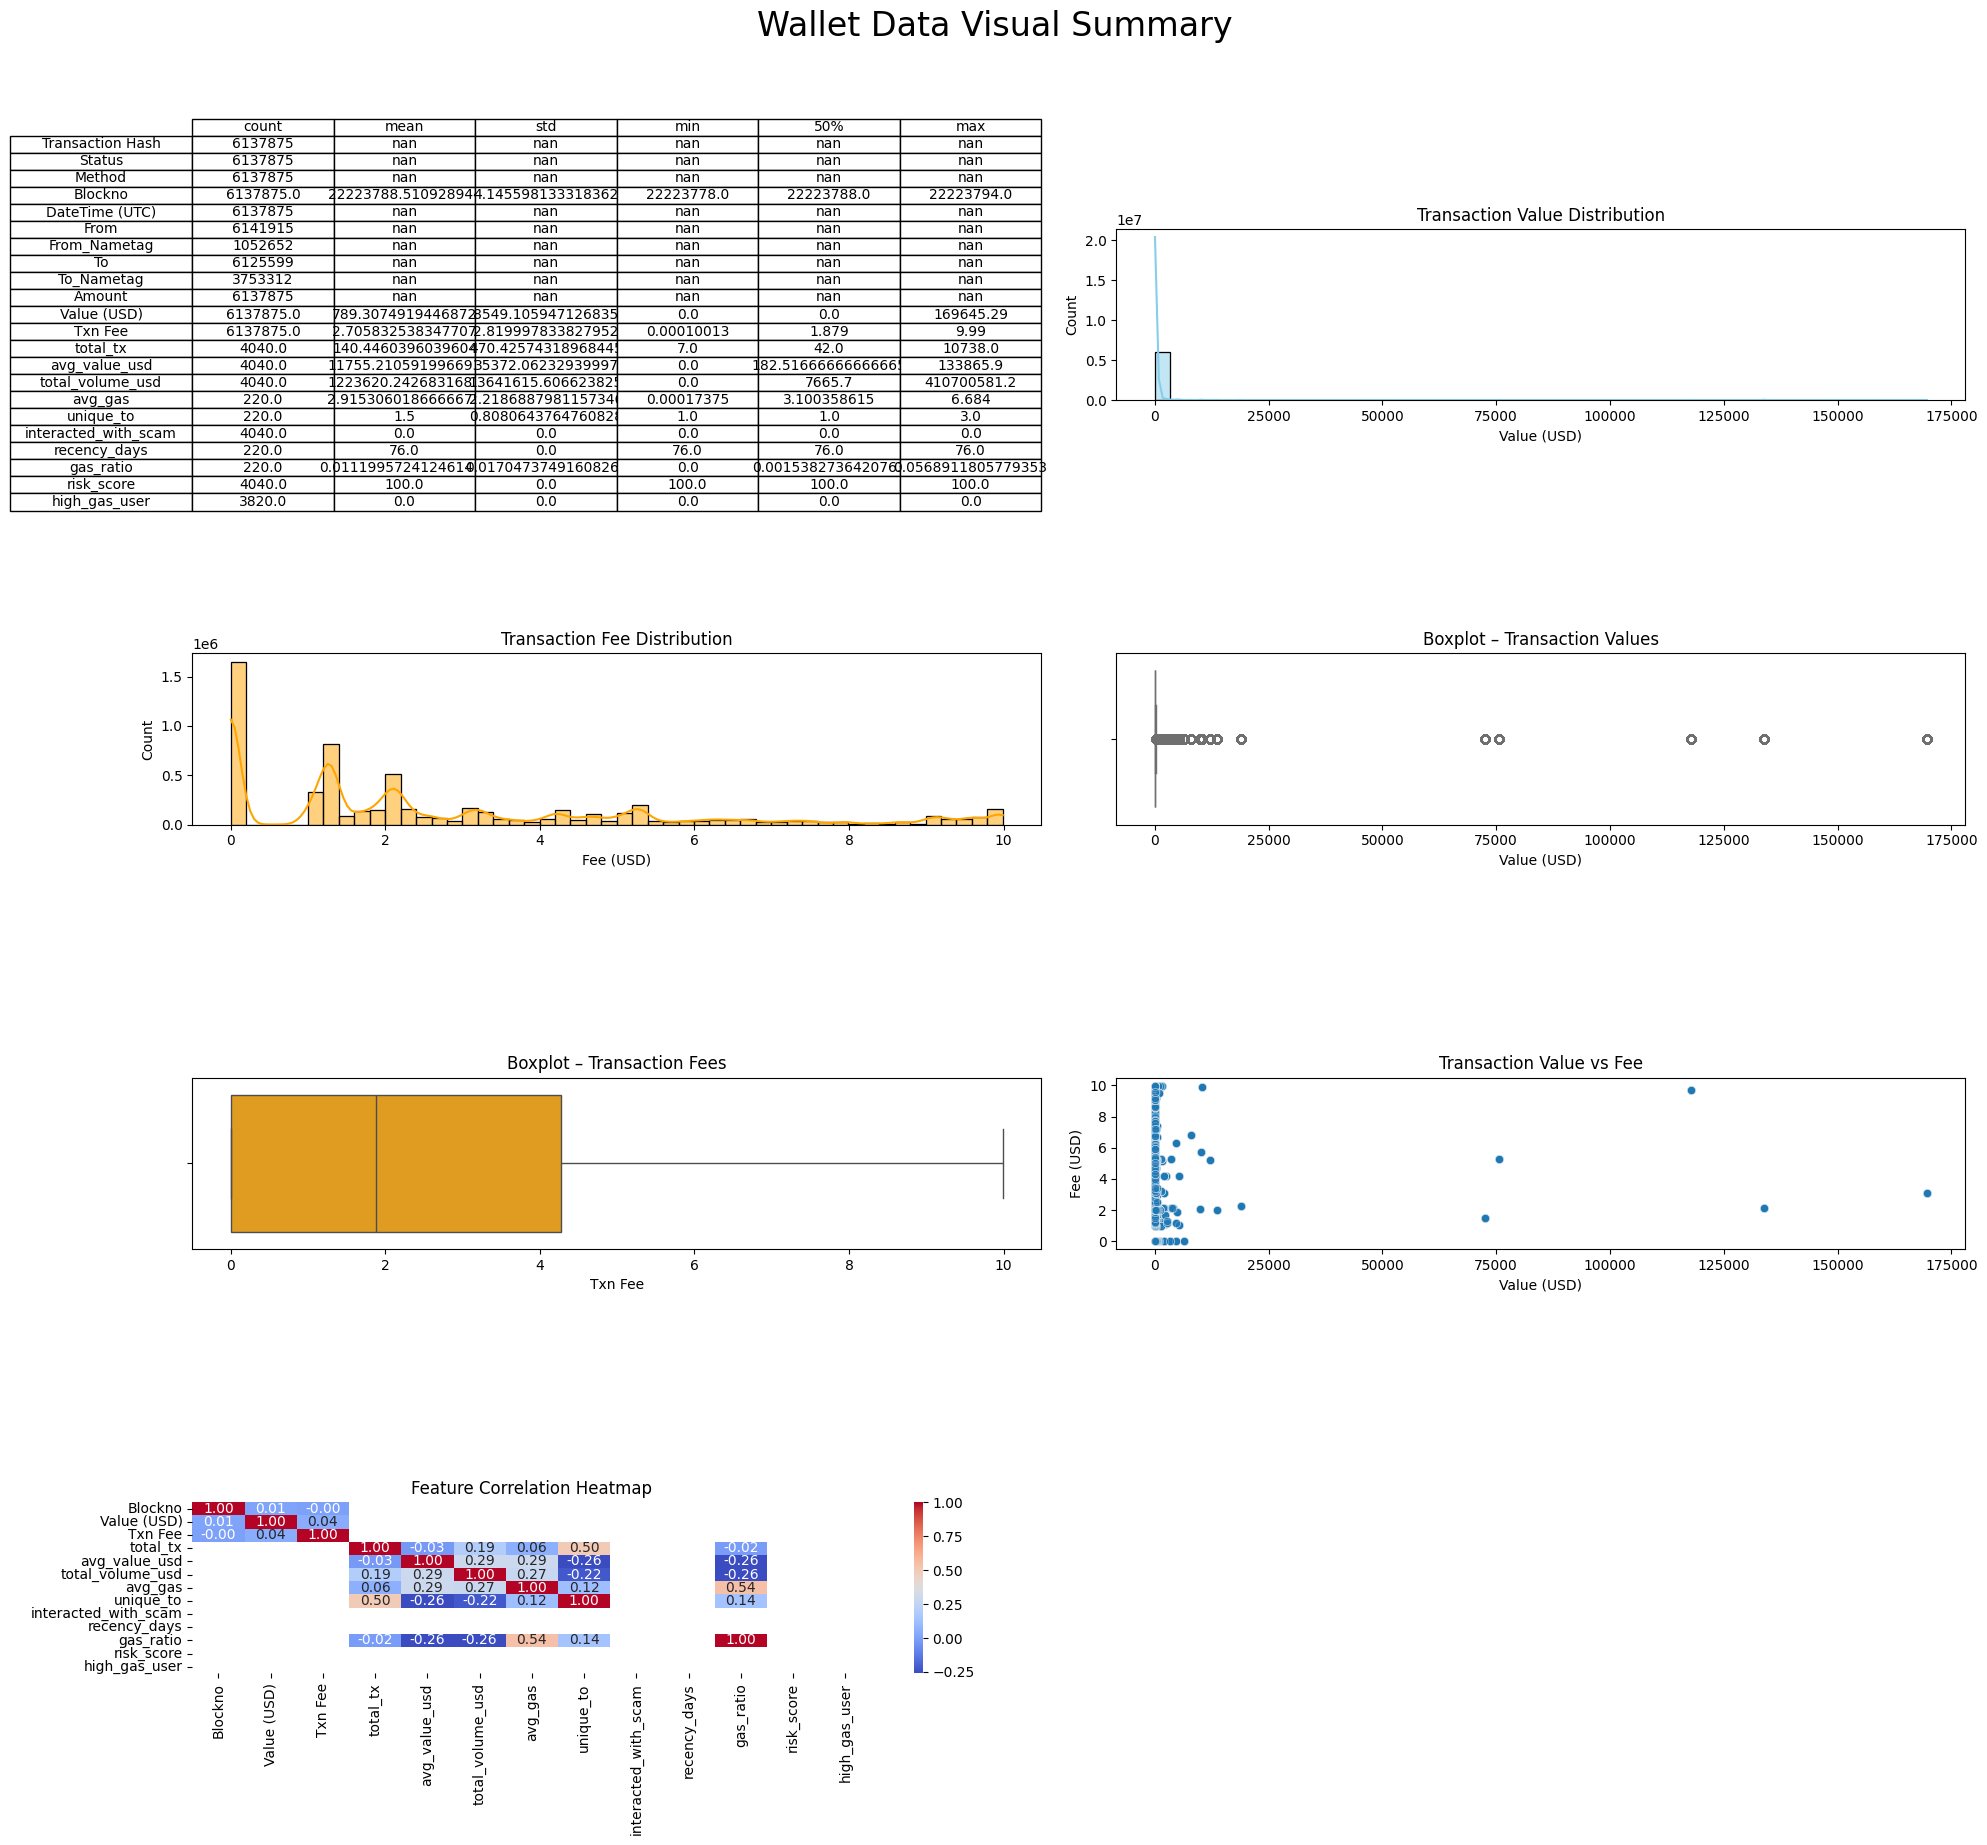

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/blockchain/cleaned_wallet_data.csv")

# ================== Dashboard Layout ==================
plt.figure(figsize=(20, 20))
plt.suptitle("Wallet Data Visual Summary", fontsize=24, y=0.92)

# --- 1. Summary Stats Table ---
summary_stats = df.describe(include='all').T[['count', 'mean', 'std', 'min', '50%', 'max']]
plt.subplot(4,2,1)
plt.axis('off')
#plt.title("Summary Statistic", fontsize=16)
table = plt.table(cellText=summary_stats.round(2).values,
                  colLabels=summary_stats.columns,
                  rowLabels=summary_stats.index,
                  loc='center',
                  cellLoc='center',
                  rowLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# --- 2. Transaction Value Distribution ---
plt.subplot(4,2,2)
sns.histplot(df['Value (USD)'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Transaction Value Distribution")
plt.xlabel("Value (USD)")

# --- 3. Transaction Fee Distribution ---
plt.subplot(4,2,3)
sns.histplot(df['Txn Fee'].dropna(), bins=50, kde=True, color='orange')
plt.title("Transaction Fee Distribution")
plt.xlabel("Fee (USD)")

# --- 4. Boxplot Transaction Values ---
plt.subplot(4,2,4)
sns.boxplot(x=df['Value (USD)'], color='skyblue')
plt.title("Boxplot – Transaction Values")

# --- 5. Boxplot Transaction Fees ---
plt.subplot(4,2,5)
sns.boxplot(x=df['Txn Fee'], color='orange')
plt.title("Boxplot – Transaction Fees")

# --- 6. Value vs Fee Scatterplot ---
plt.subplot(4,2,6)
sns.scatterplot(x='Value (USD)', y='Txn Fee', data=df, alpha=0.6)
plt.title("Transaction Value vs Fee")
plt.xlabel("Value (USD)")
plt.ylabel("Fee (USD)")

# --- 7. Correlation Heatmap ---
plt.subplot(4,2,7)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")

# --- 8. Top Wallets by Total Transaction Value ---
if 'Wallet Address' in df.columns:
    top_wallets = df.groupby('Wallet Address')['Value (USD)'].sum().nlargest(10)
    plt.subplot(4,2,8)
    sns.barplot(x=top_wallets.values, y=top_wallets.index, palette='viridis')
    plt.title("Top 10 Wallets by Total Transaction Value")
    plt.xlabel("Total Value (USD)")
    plt.ylabel("Wallet Address")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


# Second-degree counterparty count to feature engineer.

Training XGB and plug in SHAP to produce a summary plot.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from datetime import datetime
import networkx as nx


def clean_currency(column):
    return (
        column.astype(str)
        .str.extract(r"([\d,.]+)")[0]
        .str.replace(",", "", regex=False)
        .replace("", np.nan)
        .astype(float)
    )


def engineer_wallet_features(df: pd.DataFrame) -> pd.DataFrame:
    df['Value (USD)'] = clean_currency(df['Value (USD)'])
    df['Txn Fee'] = clean_currency(df['Txn Fee'])
    df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'], errors='coerce')

    # Build graph for second-degree connections
    G = nx.from_pandas_edgelist(df, source='From', target='To', create_using=nx.DiGraph())
    second_degree_counts = {node: len(set(nx.descendants(G, node))) for node in df['From'].unique()}

    grouped = df.groupby('From')
    features = grouped.agg(
        total_tx=('Transaction Hash', 'count'),
        avg_value_usd=('Value (USD)', 'mean'),
        total_volume_usd=('Value (USD)', 'sum'),
        avg_gas=('Txn Fee', 'mean'),
        unique_to=('To', pd.Series.nunique),
        last_seen=('DateTime (UTC)', 'max'),
        interacted_with_scam=('To_Nametag', lambda x: x.str.contains('scam|phish', case=False, na=False).any().astype(int)),
    ).reset_index()

    features['second_degree_count'] = features['From'].map(second_degree_counts)

    now = pd.Timestamp.now()
    features['recency_days'] = (now - features['last_seen']).dt.days
    features['gas_ratio'] = features['avg_gas'] / features['avg_value_usd'].replace(0, np.nan)
    features = features.drop(columns='last_seen')

    return features.fillna(0)


def score_unsupervised(features: pd.DataFrame) -> pd.DataFrame:
    model = IsolationForest(contamination=0.1, random_state=42)
    X = features[['total_tx', 'avg_value_usd', 'total_volume_usd', 'recency_days', 'second_degree_count']]
    scores = model.fit(X).decision_function(X)
    scores_normalized = (scores - scores.min()) / (scores.max() - scores.min())
    features['risk_score'] = (1 - scores_normalized) * 100
    return features


def score_supervised(features: pd.DataFrame) -> pd.DataFrame:
    model = XGBClassifier()
    X = features[['total_tx', 'avg_value_usd', 'total_volume_usd', 'recency_days', 'second_degree_count']]
    y = features['interacted_with_scam']
    model.fit(X, y)
    features['risk_score'] = model.predict_proba(X)[:, 1] * 100
    return features


def save_top_risky(features: pd.DataFrame, out_path="wallet_risk_scores.csv", top_n=10):
    risky = features.sort_values("risk_score", ascending=False).head(top_n)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    path = f"{out_path.rstrip('.csv')}_{timestamp}.csv"
    risky.to_csv(path, index=False)
    print(f"Top {top_n} wallets saved to {path}")


def visualize(features: pd.DataFrame):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.scatterplot(data=features, x='total_volume_usd', y='risk_score', hue='interacted_with_scam')
    plt.title("Risk Score vs Total Volume (USD)")
    plt.show()


def draw_wallet_graph(df, wallet_address):
    import matplotlib.pyplot as plt
    G = nx.from_pandas_edgelist(df, source='From', target='To', create_using=nx.DiGraph())
    ego = nx.ego_graph(G, wallet_address, radius=2, center=True, undirected=False)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(ego, seed=42)
    nx.draw(ego, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=8, edge_color='gray')
    plt.title(f"Wallet Interaction Graph (radius=2): {wallet_address}")
    plt.show()
